In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4
print('complite')

complite


In [2]:
# Get data
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


In [16]:
train.LotFrontage(type)

TypeError: 'Series' object is not callable

In [46]:
# Check for duplicates
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

# Drop Id column
train.drop("Id", axis = 1, inplace = True)

There are 0 duplicate IDs for 1460 total entries


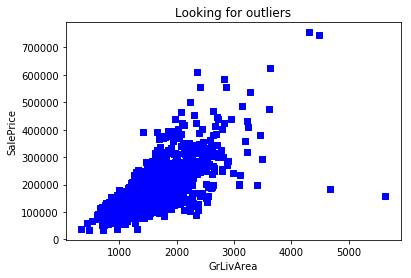

(1456, 80)

In [48]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

train = train[train.GrLivArea < 4000]
train.shape

In [8]:
# Log transform the target for official scoring
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

In [32]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000
OverallQual      0.801
GrLivArea        0.721
GarageCars       0.649
TotalBsmtSF      0.647
GarageArea       0.637
1stFlrSF         0.625
FullBath         0.559
TotRmsAbvGrd     0.537
YearBuilt        0.535
YearRemodAdd     0.521
GarageYrBlt      0.499
MasVnrArea       0.479
Fireplaces       0.467
BsmtFinSF1       0.396
LotFrontage      0.357
OpenPorchSF      0.330
WoodDeckSF       0.323
2ndFlrSF         0.297
HalfBath         0.283
LotArea          0.270
BsmtFullBath     0.236
BsmtUnfSF        0.221
BedroomAbvGr     0.161
ScreenPorch      0.118
MoSold           0.057
3SsnPorch        0.047
PoolArea         0.033
BsmtFinSF2      -0.009
MiscVal         -0.021
YrSold          -0.024
LowQualFinSF    -0.025
Id              -0.027
BsmtHalfBath    -0.037
OverallCond     -0.080
MSSubClass      -0.088
EnclosedPorch   -0.130
KitchenAbvGr    -0.139
Name: SalePrice, dtype: float64


In [35]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 37
Categorical features : 43


In [37]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 0
Remaining NAs for numerical features in train : 0


In [38]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

27 skewed numerical features to log transform


In [39]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 257
Remaining NAs for categorical features in train : 0


In [40]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

New number of features : 207


ValueError: Found input variables with inconsistent numbers of samples: [66, 1456]

In [87]:
import random
c=0
for i in range(0,30):
    a = random.randint(1000,4000)
    b = 8000*0.3

    c+=a+b
    
print(c)

143055.0


In [94]:
((5000+4000)*0.3)*30

81000.0

In [96]:
4800*5

24000

In [173]:
(10*30)-((26*3)+29+(8*7))

137

In [151]:
a = 155*5
b = 40*10
c = 21*15
d = 43*30
e = 24*60
f = 22*180
t = 3*8*60
z = 1*24*60

al = (a+b+c+d+e+f+t+z+30)/60

a = 7*5
b = 13*10
c = 9*15
d = 9*30
e = 11*60
f = 11*180
t = 7*8*60

research = (a+b+c+d+e+f+t)/60

sum = al+research

print('all = '+str(al)+' research = '+str(research)+' sum = '+str(sum))

all = 184.83333333333334 research = 109.5 sum = 294.33333333333337


In [172]:
((26*3)+29+(8*7))

163

In [143]:
week = 24*7
mounth = 24*30

print(week, mounth, (mounth - ((al+research)+(14*24))))

168 720 89.66666666666663


In [153]:
sum - (5*24+2) - (7*24)

4.333333333333371

In [160]:
155000+150000+150000+(13000*3)+(21000*2)

536000

In [168]:
90000 - (13000*2) - (21000*2)

22000

In [174]:
500/50

10.0

In [ ]:
10.5